#Importing Libraries:

In [ ]:
import torch

#Gradient Calculation:

In [ ]:
x = torch.randn(3, requires_grad = True)
#requires_grad Enables autograd to track all operations on this tensor,
#allowing gradients to be computed during backpropagation.

print(x)

tensor([-1.2470, -1.7324,  0.1558], requires_grad=True)


In [ ]:
# When we perform any operation on t1, pytorch will create a dynamic computational graph
# with nodes representing operations and edges representing flow of data
# It is used for backpropagation to calculate gradients

y = x + 2
print(y)

tensor([0.7530, 0.2676, 2.1558], grad_fn=<AddBackward0>)


###Computational Graph:
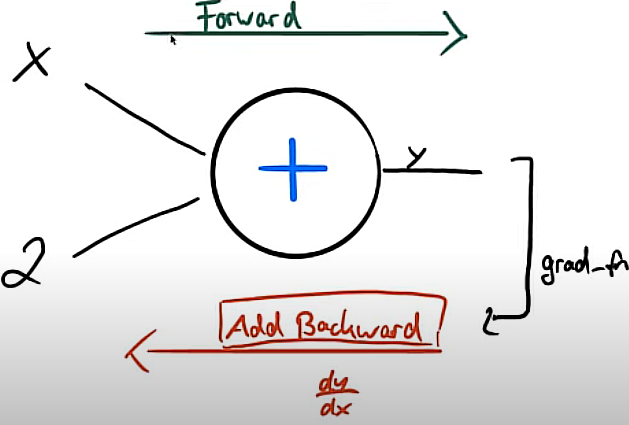

In [ ]:
z = y * y * 2
#z will also have the grad_fn attribute
print(z)

tensor([1.1341, 0.1432, 9.2948], grad_fn=<MulBackward0>)


In [ ]:
z = z.mean() #z becomes scalar

print(z)

tensor(3.5240, grad_fn=<MeanBackward0>)


In [ ]:
print(x.grad) #Output: None

z.backward() #dz/dx

print(x.grad) #x.grad are the stored gradients for x

None
tensor([1.0041, 0.3568, 2.8744])


In [ ]:
# Wwhen you compute gradients for a vector-valued function (like z),
# you must provide a gradient vector (often called the "vector of weights" or "external gradient") to backward() in order to compute the vector-Jacobian product.

z = y * y * 2 #z becomes a vector

v = torch.tensor([0.1, 0.01, 0.001]) #we need to create a vector of same size

z.backward(v) #for vectors, we need to pass an argument to backward()

print(x.grad)

tensor([1.3053, 0.3675, 2.8830])


#Preventing Gradient History:

In [ ]:
#Option 1:
x.requires_grad_(False)

#Option 2:
# x = x.detach()
#creates a new tensor that doesn't require gradient

#Option 3: Wrapping in a with statement
#with torch.no_grad:

print(x)

#Gradient Accumulation:

In [ ]:
weights = torch.ones(4, requires_grad=True)

#PyTorch accumulates gradients in .grad.
#So after each backward() call, the new gradient is added to the existing gradient.

for epoch in range(3):
  model_output = (weights*3).sum()

  model_output.backward()

  print(weights.grad)

  weights.grad.zero_() #sets gradients to zero, otherwise the output of .grad will be accumulated
  #Check difference by commenting it